# Деревья решений

Структура дерева решений представляет из себя **связный ациклический граф**.

> **Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

> **Связный граф** — это граф, в котором между любой парой существует направленная связь.

> **Ациклический граф** — это граф, в котором отсутствуют циклы, \
то есть в графе не существует такого пути, \
по которому можно вернуться в начальную вершину.

В дереве решений можно выделить **три типа вершин**:

- **Корневая вершина (root node)** — то, откуда всё начинается. \
Это первый и самый главный вопрос, который дерево задаёт объекту. 
- **Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, \
которые дерево задаёт объекту. 
- **Листья (leafs)** — конечные вершины дерева. \
Это вершины, в которых содержится конечный «ответ» — класс объекта.

> Максимально возможная длина от корня до самых дальних листьев (не включая корневую) \
называется **максимальной глубиной дерева (max depth)**.

Во внутренней или корневой вершине признак проверяется на некий логический критерий, \
по результатам которого мы движемся всё глубже по дереву.

> Логический критерий, который находится в каждой вершине, \
называется **предикатом**, или **решающим правилом**.

Предикаты — это просто взятие порога по значению какого-то признака. \
Формально это записывается следующим образом:

$$ B_{v}(x, t)=I\left[x_{j} \leq t\right] $$

Предикат вершины дерева $B_{v}$  (где $v$ — это номер вершины) \
равен 1 («Да»), если признак $x_{j}$ меньше либо равен значению $t$, \
и 0 («Нет») — в противном случае. \
Функция $I$ с квадратными скобками — это индикаторная функция: \
она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

> **Примечание**. В зависимости от реализации предикат может быть с условием $\leq$ или $\geq$. \
В реализации **sklearn** используется условие $\leq$. \
Но можно встретить другую формулировку предикатов в иных реализациях или в литературе.

Если результат предиката равен 1, \
то мы переходим по левой ветви дерева к следующему узлу, \
в противном случае — по правой ветви дерева к следующему узлу.

## Геометрическая интерпретация

Каждый новый вопрос дерева решений при его обучении \
разбивает пространство признаков на две части: \
в первую часть отправляются наблюдения, для которых предикат истинен, \
а во вторую — для которых он ложен.

## Реализация в sklearn

Модель дерева решений для решения задачи классификации реализована в классе `DecisionTreeClassifier` модуля `sklearn.tree`. \
Данный класс реализует обучение по алгоритму **CART**.\
Существует и [другие стратегии построения деревьев решений](https://scikit-learn.ru/1-10-decision-trees/#tree-algorithms-id3-c4-5-c5-0-and-cart). 

**Основные параметры DecisionTreeClassifier**

- `criterion` — критерий информативности ('`gini`' — критерий Джини и '`entropy`' — энтропия Шеннона).
- `max_depth` — максимальная глубина дерева (по умолчанию — `None`, глубина дерева не ограничена).
- `max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве \
(по умолчанию — `None`, то есть обучение производится на всех признаках). \
Нужно потому, что при большом количестве признаков \
будет «дорого» искать лучшее (по критерию типа прироста информации) \
разбиение среди всех признаков.
- `min_samples_leaf` — минимальное число объектов в листе (по умолчанию — `1`). \
У этого параметра есть понятная интерпретация: \
если он равен 5, то дерево будет порождать только те решающие правила, \
которые верны как минимум для пяти объектов.
- `random_state` — число, отвечающее за генерацию случайных чисел.

In [56]:
import seaborn as sns
from sklearn import tree # модели деревьев решения
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 

# устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from warnings import simplefilter
simplefilter('ignore')

In [57]:
# загрузим данные об ирисах
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


`species` - вид ириса, целевой признак.

In [58]:
# факторы
X = iris_data.drop(columns=['species'])
# целевой признак
y = iris_data['species']

In [59]:
# создаём объект класса DecisionTreeClassifier
decision_tree_classifier_model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности 
    max_depth=2, # максимальная глубина
    random_state=42 # генератор случайных чисел
)

# обучаем дерево решений по алгоритму CART
# для лучшей демонстрации работы алгоритма будем производить обучение и предсказание на всех признаках
decision_tree_classifier_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

Обученное дерево можно визуализировать в виде графа, \
чтобы посмотреть, как дерево делает предсказание. \
Для этого есть функция `plot_tree()` из модуля `tree`.

Основные параметры функции:
- `decision_tree` — объект обученного дерева решений,
- `feature_names` — наименования факторов,
- `class_names` — названия классов,
- `filled` — добавлять ли расцветку вершин графа.

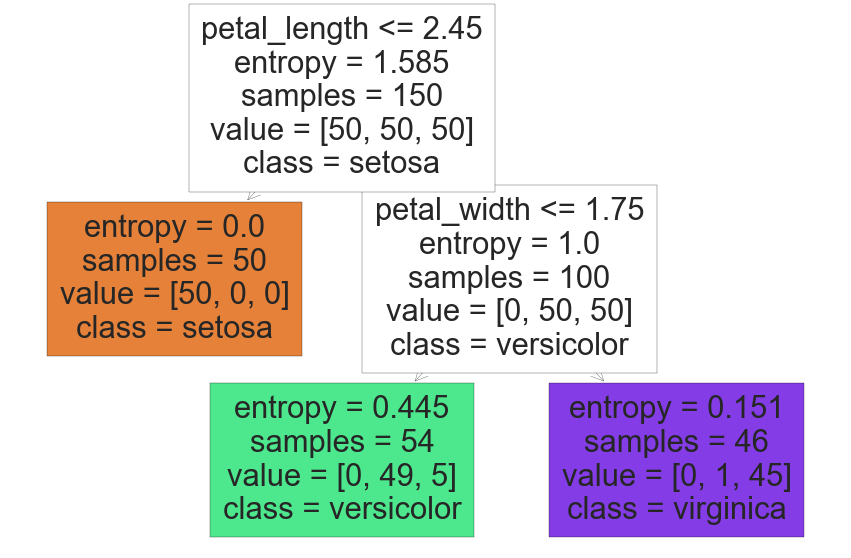

In [60]:
# Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))

# Строим граф дерева решений
tree.plot_tree(
    decision_tree_classifier_model, # объект обученного дерева
    feature_names=X.columns, # наименования факторов
    class_names=['setosa', 'versicolor', 'virginica'], # имена классов
    filled=True, # расцветка графа
);

В каждом блоке указаны следующие данные:

- **Предикат** $I\left[x_{j} \leq t\right]$ — условие, по которому выборка делится на две части: \
на ту, для которой условие выполняется, и ту, для которой не выполняется.
- **entropy** — критерий информативности.
- **samples** — количество объектов, которые мы проверяем на данном шаге.
- **value** — распределение по классам для объектов, \
которые мы проверяем на данном шаге: \
например value=[0, 50, 50] означает, \
что на текущем этапе разделения в выборке находится 0 объектов класса setosa \
и по 50 объектов классов versicolor и virginica.
- **class** — класс, который присваивается, если выполнение алгоритма завершается на данном шаге.

Построим диаграмму рассеяния для видов ирисов. \
И проиллюстрируем на ней решения дерева.

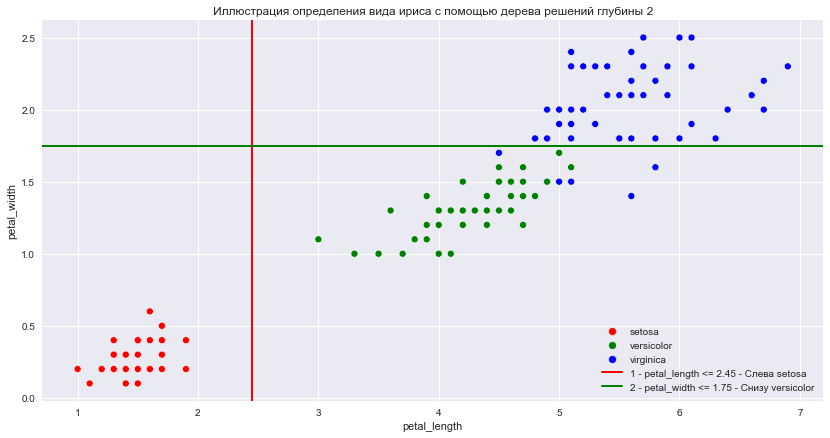

In [61]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize = (14, 7)) 

# диаграмма рассеяния
sns.scatterplot(
    data=iris_data, # датасет
    x='petal_length', # ось абсцисс
    y='petal_width', # ось ординат
    hue='species', # группировка
    # словарь с соответствием значений из species цвету точки
    palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}, 
    ax=ax, # координатная плоскость
);

# прямые, иллюстрирующие принятие решений деревом
ax.axvline(2.45, color='red', ls='-', lw=2, label='1 - petal_length <= 2.45 - Слева setosa')
ax.axhline(1.75, color='green', ls='-', lw=2, label='2 - petal_width <= 1.75 - Снизу versicolor')

# Задаём название графику
ax.set_title('Иллюстрация определения вида ириса с помощью дерева решений глубины 2');

plt.legend()

Для каждой области можно подсчитать вероятность каждого из классов. \
Это отношение количества объектов $k$-класса, \
которые попали в лист дерева, к общему количеству объектов в листе.

Например, для области с зелеными точкамми (вид versicolor):
$$ \hat{P} (класс \ = \ setosa) = \frac{0}{54} = 0 $$
$$ \hat{P} (класс \ = \ virginica) = \frac{5}{54} = 0.09 $$
$$ \hat{P} (класс \ = \ versicolor) = \frac{49}{54} = 0.91 $$

Метод `predict_proba()` — возвращает вероятности принадлежности к каждому из классов:

In [62]:
# делаем предсказание вероятностей:
y_predict_proba = decision_tree_classifier_model.predict_proba(X)
y_predict_proba[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [63]:
# сделаем предсказание
y_predict = decision_tree_classifier_model.predict(X)

In [64]:
# посчитаем метрики
print(metrics.classification_report(y, y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.98      0.94        50
   virginica       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Важно использовать регуляризацию деревьев решений во избежание переобучения.

- ограничивать их максимальную глубину (`max_depth`) \
и минимальное число объектов в листе (`min_samples_leaf`).
- проверять результат на тестовой выборке.

При работе с непрерывными числовыми признаками \
дерево делит их на категории и теряет информацию. \
Лучше всего дерево работает, если перевести числовые признаки в категориальные.

Поле `max_depth` позволяет посмотреть глубину дерева.

In [65]:
decision_tree_classifier_model.max_depth

2

Поле `feature_importances_` позволяет определить значимость признаков.

In [66]:
decision_tree_classifier_model.feature_importances_

array([0.        , 0.        , 0.66620285, 0.33379715])

Выведенные значения - это коэффициенты значимости каждого из признаков. \
Построим столбчатую диаграмму:

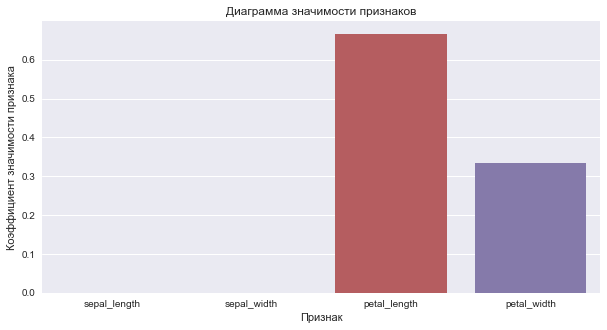

In [67]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10, 5)) 
# признаки
feature = X.columns 
# важность признаков
feature_importances = decision_tree_classifier_model.feature_importances_ 

# столбчатая диаграмма
sns.barplot(x=feature, y=feature_importances, ax=ax);

# название графика и осей
ax.set_title('Диаграмма значимости признаков')
ax.set_xlabel('Признак')
ax.set_ylabel('Коэффициент значимости признака');

> **Примечание**. Не стоит приравнивать ***значимость*** к ***корреляции***. \
***Корреляция*** — это коэффициент линейной зависимости, \
а ***значимость*** может отражать и нелинейные связи (в зависимости от сложности дерева).

## Поиск параметров дерева решений

В деревьях для каждого узла выбираются такие признаки $x_{j}$ и их пороговые значения $t$, \
при которых произойдёт разделение набора на две части по некоторому критерию наилучшим образом.

Выбор делается путем полного перебора признаков и их пороговых значений.

Критерием служит функция, которая возвращает критерий информативности.\
Её значение уменьшается с уменьшением разброса ответов на выборке.\
В деревьях решений в качестве таких функций используются **энтропия Шеннона** и **критерий Джини**. 

### Критерии информативности

#### Энтропия Шеннона

$$ H(Q) = -\sum_{i=1}^{k} \ P_{i} \ log_{2} \ P_{i}, $$

где  
- $k$ — количество классов,  
- $P_{i}$ — вероятность принадлежности объекта к $i$-му классу,
- $log_{2}$  — логарифм по основанию 2.

**Энтропия** — это  важное понятие, используемое в физике, теории информации и других областях. \
Опуская предпосылки введения этого понятия, отметим, что интуитивно энтропия соответствует **степени хаоса в системе**. \
Чем выше энтропия, тем менее упорядочена система, и наоборот.

#### Критерий Джини

$$ H(Q) = \sum_{i=1}^{k} \ P_{i} \ (1-P_{i}), $$

где 
- $k$ — количество классов, 
- $P_i$ — вероятность принадлежности объекта к $i$-му классу.

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. \
Его минимум достигается только в том случае, когда все объекты в выборке относятся к одному классу.